In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

## 1) Reading Data From text files & Data assessing

In [2]:
#reading healthy dataset into pandas datframe
df_h = pd.read_csv("lusc-rsem-fpkm-tcga_paired.txt", sep='\t',index_col=0)

#reading cancerous dataset into pandas datframe
df_c = pd.read_csv("lusc-rsem-fpkm-tcga-t_paired.txt", sep='\t',index_col=0)


 ###  Exploring DATA of the two sets

In [3]:
df_h.head(10)

,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,54.33,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,175.07,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,603.67,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,28.04,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,120.10,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
AC024592.12,0,25.91,32.13,17.38,13.72,21.01,28.86,23.59,34.02,36.01,...,37.32,20.56,32.13,28.86,11.30,18.84,33.78,23.93,29.70,20.26
GSDMD,79792,1733.13,2835.70,1508.65,1936.53,1819.35,2502.97,2090.03,2434.50,1757.34,...,2720.15,1950.00,2018.80,2004.85,2417.67,2209.26,1417.35,1733.13,2739.08,2835.70
AKR1C1,1645,1088.92,947.83,684.02,860.08,1096.50,2090.03,1369.04,1151.06,1119.56,...,511.00,660.68,1051.79,743.43,961.07,1242.34,486.75,417.77,981.29,1733.13
C3orf62,375341,122.64,181.28,181.28,150.17,183.82,117.60,106.63,150.17,100.83,...,194.36,183.82,120.94,84.63,130.60,166.73,198.47,74.58,190.34,135.24


In [4]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19648 entries, HIST3H2A to FUT2
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entrez_Gene_Id  19648 non-null  int64  
 1   TCGA-43-7657    19648 non-null  float64
 2   TCGA-58-8386    19648 non-null  float64
 3   TCGA-22-5478    19648 non-null  float64
 4   TCGA-22-5472    19648 non-null  float64
 5   TCGA-43-5670    19648 non-null  float64
 6   TCGA-60-2709    19648 non-null  float64
 7   TCGA-22-5489    19648 non-null  float64
 8   TCGA-77-8007    19648 non-null  float64
 9   TCGA-22-5471    19648 non-null  float64
 10  TCGA-22-4609    19648 non-null  float64
 11  TCGA-22-5482    19648 non-null  float64
 12  TCGA-56-8082    19648 non-null  float64
 13  TCGA-22-5483    19648 non-null  float64
 14  TCGA-56-8623    19648 non-null  float64
 15  TCGA-33-4587    19648 non-null  float64
 16  TCGA-56-7579    19648 non-null  float64
 17  TCGA-43-3394    19648 non-null

In [5]:
df_c.head(10)

,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,397.93,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,258.57,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,587.13,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,1.38,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,336.79,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
AC024592.12,0,17.13,25.91,16.88,63.45,27.84,23.08,46.50,27.05,38.95,...,8.58,32.13,32.59,21.63,5.19,28.65,14.45,27.05,16.63,29.48
GSDMD,79792,1551.09,1427.22,1674.06,1685.71,3124.78,2133.97,2451.44,2240.11,1467.37,...,2075.59,1135.20,1832.01,1208.34,1883.54,988.12,941.27,909.17,1135.20,2004.85
AKR1C1,1645,9945.68,723.08,1023.00,1242.34,136.19,40621.74,660.68,84.04,5366.37,...,884.29,1175.27,1143.10,656.11,334.46,52135.28,2133.97,934.76,37379.55,5403.70
C3orf62,375341,82.29,111.21,59.97,100.83,98.04,112.77,52.08,137.14,79.45,...,62.56,129.69,48.18,167.90,80.01,65.26,104.42,68.55,122.64,84.63


In [6]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19648 entries, HIST3H2A to FUT2
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entrez_Gene_Id  19648 non-null  int64  
 1   TCGA-43-7657    19648 non-null  float64
 2   TCGA-58-8386    19648 non-null  float64
 3   TCGA-22-5478    19648 non-null  float64
 4   TCGA-22-5472    19648 non-null  float64
 5   TCGA-43-5670    19648 non-null  float64
 6   TCGA-60-2709    19648 non-null  float64
 7   TCGA-22-5489    19648 non-null  float64
 8   TCGA-77-8007    19648 non-null  float64
 9   TCGA-22-5471    19648 non-null  float64
 10  TCGA-22-4609    19648 non-null  float64
 11  TCGA-22-5482    19648 non-null  float64
 12  TCGA-56-8082    19648 non-null  float64
 13  TCGA-22-5483    19648 non-null  float64
 14  TCGA-56-8623    19648 non-null  float64
 15  TCGA-33-4587    19648 non-null  float64
 16  TCGA-56-7579    19648 non-null  float64
 17  TCGA-43-3394    19648 non-null

###  Remove extra indexing column

In [7]:
df_h.drop('Entrez_Gene_Id', inplace=True, axis=1)
df_c.drop('Entrez_Gene_Id', inplace=True, axis=1)

### Remove Rows of more than 50% zero values

In [8]:
zeros_percentage = df_h[df_h == 0].count(axis=1)/len(df_h.columns)
filtered_genes_1=0
for index, value in zeros_percentage.items():
    if value > 0.5:
        df_h.drop(index,inplace=True)
        df_c.drop(index,inplace=True)
        filtered_genes_1 +=1



In [9]:
# filtered rows in first check
filtered_genes_1

1973

In [10]:
# make sure that df_c hasn't any more than 50% zero rows  
zeros_percentage = df_c[df_c == 0].count(axis=1)/len(df_h.columns)
zeros_percentage.sort_values(ascending=False )



Hugo_Symbol
GPR112       0.98
GYPB         0.96
LINC00935    0.94
AKAP4        0.92
OR6N1        0.90
             ... 
SLC22A18     0.00
POLR2B       0.00
TMCO3        0.00
LYRM4        0.00
HIST3H2A     0.00
Length: 17675, dtype: float64

In [11]:
# Deleting the rows from both datasets
filtered_genes_2=0
for index, value in zeros_percentage.items():
    if value > 0.5:
        df_h.drop(index,inplace=True)
        df_c.drop(index,inplace=True)
        filtered_genes_2 +=1


In [12]:
# filtered rows in first check
filtered_genes_2

338

### Exploring datasets after cleaning

In [13]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17337 entries, HIST3H2A to FUT2
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TCGA-43-7657  17337 non-null  float64
 1   TCGA-58-8386  17337 non-null  float64
 2   TCGA-22-5478  17337 non-null  float64
 3   TCGA-22-5472  17337 non-null  float64
 4   TCGA-43-5670  17337 non-null  float64
 5   TCGA-60-2709  17337 non-null  float64
 6   TCGA-22-5489  17337 non-null  float64
 7   TCGA-77-8007  17337 non-null  float64
 8   TCGA-22-5471  17337 non-null  float64
 9   TCGA-22-4609  17337 non-null  float64
 10  TCGA-22-5482  17337 non-null  float64
 11  TCGA-56-8082  17337 non-null  float64
 12  TCGA-22-5483  17337 non-null  float64
 13  TCGA-56-8623  17337 non-null  float64
 14  TCGA-33-4587  17337 non-null  float64
 15  TCGA-56-7579  17337 non-null  float64
 16  TCGA-43-3394  17337 non-null  float64
 17  TCGA-34-8454  17337 non-null  float64
 18  TCGA-77-7338  17337 non-n

In [ ]:
df_c.info()

In [14]:
df_h.head(10)

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
HIST3H2A,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,397.93,318.57,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
LIN7B,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,258.57,218.79,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
LXN,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,587.13,638.15,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
CNKSR2,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,1.38,8.71,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
SCML1,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,336.79,171.45,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
AC024592.12,17.13,25.91,16.88,63.45,27.84,23.08,46.50,27.05,38.95,36.53,...,8.58,32.13,32.59,21.63,5.19,28.65,14.45,27.05,16.63,29.48
GSDMD,1551.09,1427.22,1674.06,1685.71,3124.78,2133.97,2451.44,2240.11,1467.37,1477.58,...,2075.59,1135.20,1832.01,1208.34,1883.54,988.12,941.27,909.17,1135.20,2004.85
AKR1C1,9945.68,723.08,1023.00,1242.34,136.19,40621.74,660.68,84.04,5366.37,1111.82,...,884.29,1175.27,1143.10,656.11,334.46,52135.28,2133.97,934.76,37379.55,5403.70
C3orf62,82.29,111.21,59.97,100.83,98.04,112.77,52.08,137.14,79.45,76.17,...,62.56,129.69,48.18,167.90,80.01,65.26,104.42,68.55,122.64,84.63


In [15]:
df_c.head(10)

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
HIST3H2A,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,397.93,318.57,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
LIN7B,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,258.57,218.79,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
LXN,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,587.13,638.15,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
CNKSR2,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,1.38,8.71,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
SCML1,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,336.79,171.45,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
AC024592.12,17.13,25.91,16.88,63.45,27.84,23.08,46.50,27.05,38.95,36.53,...,8.58,32.13,32.59,21.63,5.19,28.65,14.45,27.05,16.63,29.48
GSDMD,1551.09,1427.22,1674.06,1685.71,3124.78,2133.97,2451.44,2240.11,1467.37,1477.58,...,2075.59,1135.20,1832.01,1208.34,1883.54,988.12,941.27,909.17,1135.20,2004.85
AKR1C1,9945.68,723.08,1023.00,1242.34,136.19,40621.74,660.68,84.04,5366.37,1111.82,...,884.29,1175.27,1143.10,656.11,334.46,52135.28,2133.97,934.76,37379.55,5403.70
C3orf62,82.29,111.21,59.97,100.83,98.04,112.77,52.08,137.14,79.45,76.17,...,62.56,129.69,48.18,167.90,80.01,65.26,104.42,68.55,122.64,84.63


##  2) Correlation between the normal samples and the diseased samples

### 2.1 Checking montonicity and the the strength of association between the two datasets using  Spearman's CC

In [16]:
 Corr_spearman=pd.Series(map(lambda k: st.spearmanr(k[0], k[1])[0], zip(df_h.values, df_c.values)), index=df_h.index)

####  porportion of montonically increasing genes

In [17]:
mont_increasing =len(Corr_spearman[Corr_spearman.values >0])/len(Corr_spearman)
print("porpotion of montonically increasing genes : " , mont_increasing)

mont_decreasing =len(Corr_spearman[Corr_spearman.values <0])/len(Corr_spearman)
print("porpotion of montonically Decreasing genes : " , mont_decreasing)

mont_decreasing =len(Corr_spearman[Corr_spearman.values ==0])/len(Corr_spearman)
print("not monotonic  : " , mont_decreasing)

porpotion of montonically increasing genes :  0.7269423775739747
porpotion of montonically Decreasing genes :  0.2727692218953683
not monotonic  :  0.0002884005306569764


####  Ranking spearman's cc

In [18]:
Corr_spearman.sort_values(ascending=False , inplace=True)
Corr_spearman

Hugo_Symbol
NPIPA8          0.871004
FAM21B          0.787956
NPIPB15         0.786447
F8A1            0.763646
POMZP3          0.761763
                  ...   
CNNM4          -0.415768
ZFYVE20        -0.420262
TK1            -0.433431
RP11-345J4.3   -0.458228
TRIM15         -0.489258
Length: 17337, dtype: float64

#### Reporting Highest Positive CC And Lowest Negative 

In [19]:
sp_highest_gene= Corr_spearman.index[0]
print("Highest CC For gene:",sp_highest_gene)

Highest CC For gene: NPIPA8


In [20]:
Corr_spearman.sort_values(ascending=True , inplace=True)
sp_lowest_gene= Corr_spearman.index[0]
print("Lowest CC For gene:",sp_lowest_gene)

Lowest CC For gene: TRIM15


#### Plotting The expression level for both genes

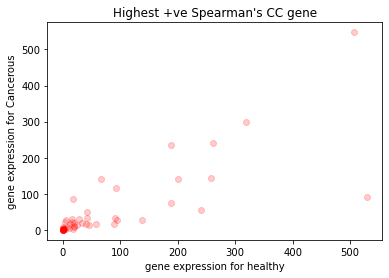

In [21]:
#highest positive cc gene
h_gene_highest_sp = df_h.loc[sp_highest_gene]
c_gene_highest_sp = df_c.loc[sp_highest_gene]
## plotting gene data 
plt.scatter(h_gene_highest_sp ,c_gene_highest_sp , alpha=0.2,c="red")
plt.title("Highest +ve Spearman's CC gene")
plt.xlabel('gene expression for healthy')
plt.ylabel('gene expression for Cancerous')

plt.show()

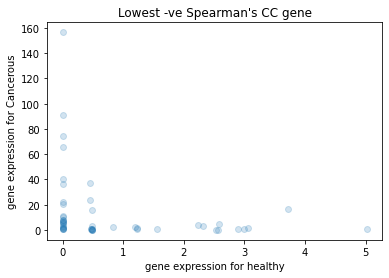

In [22]:
#Lowest Negative cc gene
h_gene_lowest_sp = df_h.loc[sp_lowest_gene]
c_gene_lowest_sp = df_c.loc[sp_lowest_gene]
## plotting gene data 
plt.scatter(h_gene_lowest_sp ,c_gene_lowest_sp , alpha=0.2)
plt.title("Lowest -ve Spearman's CC gene")
plt.xlabel('gene expression for healthy')
plt.ylabel('gene expression for Cancerous')
plt.show()

### 2.2 Pearson's CC


In [23]:
Corr_pearson=pd.Series(map(lambda k: st.pearsonr(k[0], k[1])[0], zip(df_h.values, df_c.values)), index=df_h.index)

In [24]:
Corr_pearson

Hugo_Symbol
HIST3H2A         0.010399
LIN7B            0.109313
LXN             -0.071221
CNKSR2          -0.010463
SCML1           -0.122556
                   ...   
ZNF521           0.059694
SPINT2           0.099033
HAVCR2           0.169032
CTD-2116N17.1    0.135677
FUT2            -0.047345
Length: 17337, dtype: float64

In [25]:
pos_linear =len(Corr_pearson[Corr_pearson.values >0])/len(Corr_pearson)
print("porpotion of +ve linear corr : " , pos_linear)

neg_linear =len(Corr_pearson[Corr_pearson.values <0])/len(Corr_pearson)
print("porpotion of -ve linear corr : " , neg_linear)

no_linear =len(Corr_pearson[Corr_pearson.values ==0])/len(Corr_pearson)
print("porpotion of no linear corr : " , no_linear)

porpotion of +ve linear corr :  0.6641287419968853
porpotion of -ve linear corr :  0.33587125800311474
porpotion of no linear corr :  0.0


####  Ranking Pearson's cc

In [26]:
Corr_pearson.sort_values(ascending=False , inplace=True)
Corr_pearson

Hugo_Symbol
AREGB       0.969044
OR7D2       0.930574
GUCA1A      0.878029
MTRNR2L2    0.847577
NUTM2E      0.826948
              ...   
S100A6     -0.402969
VPRBP      -0.416206
ZFYVE20    -0.418618
PTPRJ      -0.424345
FAM222B    -0.452807
Length: 17337, dtype: float64

#### Reporting Highest Positive CC And Lowest Negative 

In [27]:
pear_highest_gene= Corr_pearson.index[0]
print("Highest CC For gene:",pear_highest_gene)

Highest CC For gene: AREGB


In [28]:
Corr_pearson.sort_values(ascending=True , inplace=True)
pear_lowest_gene= Corr_pearson.index[0]
print("Lowest CC For gene:",pear_lowest_gene)

Lowest CC For gene: FAM222B


#### Plotting The expression level for both genes

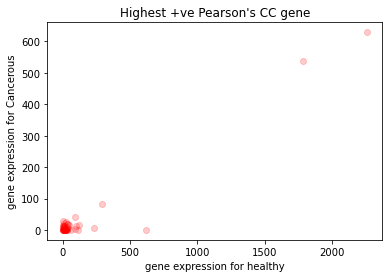

In [29]:
#highest positive cc gene
h_gene_highest_pear = df_h.loc[pear_highest_gene]
c_gene_highest_pear = df_c.loc[pear_highest_gene]
## plotting gene data 
plt.scatter(h_gene_highest_pear ,c_gene_highest_pear , alpha=0.2,c="red")
plt.title("Highest +ve Pearson's CC gene")
plt.xlabel('gene expression for healthy')
plt.ylabel('gene expression for Cancerous')

plt.show()

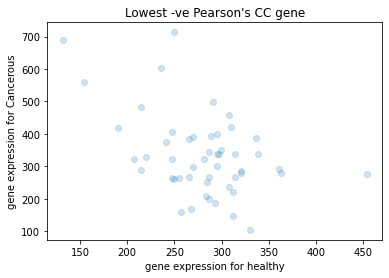

In [30]:
#Lowest Negative cc gene
h_gene_lowest_pear = df_h.loc[pear_lowest_gene]
c_gene_lowest_pear = df_c.loc[pear_lowest_gene]
## plotting gene data 
plt.scatter(h_gene_lowest_pear ,c_gene_lowest_pear , alpha=0.2)
plt.title("Lowest -ve Pearson's CC gene")
plt.xlabel('gene expression for healthy')
plt.ylabel('gene expression for Cancerous')

plt.show()

## Hypothesis Testing 

1) Samples are related (Paired)

In [31]:
#computing P values in case of the related (paired) samples
p_value_rel = pd.Series(map(lambda k: st.ttest_rel(k[0], k[1]).pvalue, zip(df_h.values, df_c.values)), index=df_h.index)

In [32]:
p_value_rel

Hugo_Symbol
HIST3H2A         4.043607e-08
LIN7B            2.891646e-01
LXN              2.322367e-04
CNKSR2           3.420577e-12
SCML1            6.251346e-02
                     ...     
ZNF521           4.142164e-06
SPINT2           2.452619e-07
HAVCR2           2.435125e-13
CTD-2116N17.1    4.129496e-11
FUT2             1.166719e-06
Length: 17337, dtype: float64

### FDR Correcetion

In [33]:
from statsmodels.stats.multitest import multipletests
import numpy as np

In [34]:
from array import *
p_values_rel = p_value_rel.values.tolist()

In [35]:
#computing P values after FDR correction in case of the related (paired) samples
corrected_pvals_rel = multipletests(p_values_rel, alpha=0.05, method='fdr_bh')[1]

In [36]:
significance_genes_rel = pd.DataFrame({'p-values': p_value_rel, 'p-values_fdr': corrected_pvals_rel})
significance_genes_rel

,p-values,p-values_fdr
Hugo_Symbol,,
HIST3H2A,4.043607e-08,1.453535e-07
LIN7B,2.891646e-01,3.361662e-01
LXN,2.322367e-04,4.589409e-04
CNKSR2,3.420577e-12,2.454576e-11
SCML1,6.251346e-02,8.361332e-02
...,...,...
ZNF521,4.142164e-06,1.084620e-05
SPINT2,2.452619e-07,7.782037e-07
HAVCR2,2.435125e-13,2.167236e-12


In [37]:
#rejecting the null hypothesis to get the DEGs 
#by comparing the p vlaue for each gene to alpha/2
significance_genes_rel['significance:p_value'] = significance_genes_rel['p-values'].apply(lambda x: x < 0.05)
significance_genes_rel['significance:p_value_fdr'] = significance_genes_rel['p-values_fdr'].apply(lambda x: x < 0.05)
significance_genes_rel

,p-values,p-values_fdr,significance:p_value,significance:p_value_fdr
Hugo_Symbol,,,,
HIST3H2A,4.043607e-08,1.453535e-07,True,True
LIN7B,2.891646e-01,3.361662e-01,False,False
LXN,2.322367e-04,4.589409e-04,True,True
CNKSR2,3.420577e-12,2.454576e-11,True,True
SCML1,6.251346e-02,8.361332e-02,False,False
...,...,...,...,...
ZNF521,4.142164e-06,1.084620e-05,True,True
SPINT2,2.452619e-07,7.782037e-07,True,True
HAVCR2,2.435125e-13,2.167236e-12,True,True


In [38]:
# Get significant genes after fdr correction
diffrentially_genes_rel = significance_genes_rel[significance_genes_rel['significance:p_value_fdr']== True]
diffrentially_genes_rel

,p-values,p-values_fdr,significance:p_value,significance:p_value_fdr
Hugo_Symbol,,,,
HIST3H2A,4.043607e-08,1.453535e-07,True,True
LXN,2.322367e-04,4.589409e-04,True,True
CNKSR2,3.420577e-12,2.454576e-11,True,True
GSDMD,3.041721e-06,8.138012e-06,True,True
AKR1C1,1.938575e-05,4.557162e-05,True,True
...,...,...,...,...
ZNF521,4.142164e-06,1.084620e-05,True,True
SPINT2,2.452619e-07,7.782037e-07,True,True
HAVCR2,2.435125e-13,2.167236e-12,True,True


In [39]:
DEGs_rel=diffrentially_genes_rel.index.tolist()

In [40]:
DEGs_df_rel=pd.DataFrame(DEGs_rel)

2) Samples are indepdent

In [41]:
#computing P values in case of the independent samples
p_value_indep = pd.Series(map(lambda k: st.ttest_ind(k[0], k[1]).pvalue, zip(df_h.values, df_c.values)), index=df_h.index)

In [42]:
p_value_indep

Hugo_Symbol
HIST3H2A         3.607140e-09
LIN7B            3.138295e-01
LXN              8.164044e-05
CNKSR2           6.374652e-15
SCML1            4.726590e-02
                     ...     
ZNF521           2.273493e-06
SPINT2           5.250215e-08
HAVCR2           1.228186e-14
CTD-2116N17.1    1.068283e-12
FUT2             2.133666e-07
Length: 17337, dtype: float64

### FDR Correcetion

In [43]:
p_values_indep = p_value_indep.values.tolist()
#computing P values after FDR correction in case of independent samples
corrected_pvals_indep = multipletests(p_values_indep, alpha=0.05, method='fdr_bh')[1]

In [44]:
significance_genes_indep = pd.DataFrame({'p-values': p_value_indep, 'p-values_fdr': corrected_pvals_indep})
significance_genes_indep

,p-values,p-values_fdr
Hugo_Symbol,,
HIST3H2A,3.607140e-09,1.378074e-08
LIN7B,3.138295e-01,3.634996e-01
LXN,8.164044e-05,1.721689e-04
CNKSR2,6.374652e-15,5.034958e-14
SCML1,4.726590e-02,6.508211e-02
...,...,...
ZNF521,2.273493e-06,5.991116e-06
SPINT2,5.250215e-08,1.720661e-07
HAVCR2,1.228186e-14,9.339061e-14


In [45]:
#rejecting the null hypothesis to get the DEGs 
#by comparing the p vlaue for each gene to alpha/2
significance_genes_indep['significance:p_value'] = significance_genes_indep['p-values'].apply(lambda x: x < 0.05)
significance_genes_indep['significance:p_value_fdr'] = significance_genes_indep['p-values_fdr'].apply(lambda x: x < 0.05)
significance_genes_indep

,p-values,p-values_fdr,significance:p_value,significance:p_value_fdr
Hugo_Symbol,,,,
HIST3H2A,3.607140e-09,1.378074e-08,True,True
LIN7B,3.138295e-01,3.634996e-01,False,False
LXN,8.164044e-05,1.721689e-04,True,True
CNKSR2,6.374652e-15,5.034958e-14,True,True
SCML1,4.726590e-02,6.508211e-02,True,False
...,...,...,...,...
ZNF521,2.273493e-06,5.991116e-06,True,True
SPINT2,5.250215e-08,1.720661e-07,True,True
HAVCR2,1.228186e-14,9.339061e-14,True,True


In [46]:
# Get significant genes after fdr correction
diffrentially_genes_indep = significance_genes_indep[significance_genes_indep['significance:p_value_fdr']== True]
diffrentially_genes_indep

,p-values,p-values_fdr,significance:p_value,significance:p_value_fdr
Hugo_Symbol,,,,
HIST3H2A,3.607140e-09,1.378074e-08,True,True
LXN,8.164044e-05,1.721689e-04,True,True
CNKSR2,6.374652e-15,5.034958e-14,True,True
GSDMD,5.344289e-06,1.337191e-05,True,True
AKR1C1,7.857877e-06,1.921738e-05,True,True
...,...,...,...,...
ZNF521,2.273493e-06,5.991116e-06,True,True
SPINT2,5.250215e-08,1.720661e-07,True,True
HAVCR2,1.228186e-14,9.339061e-14,True,True


In [47]:
DEGs_indep=diffrentially_genes_indep.index.tolist()

In [48]:
DEGs_df_indep=pd.DataFrame(DEGs_indep)

In [49]:
#common genes between DEGs sets (paired and independent) after the FDR correction
common=set(DEGs_indep) & set(DEGs_rel) 

In [50]:
len(common) #the number of common genes between DEGs sets (paired and independent)

12241

In [51]:
common_df=pd.DataFrame(common)

In [52]:
#Distinct genes in DEGs set (independent) that are not in DEGs set (paired) after the FDR correction
Dis_DEGs_indep=set(DEGs_indep) - set(DEGs_rel)

In [53]:
len(Dis_DEGs_indep) #the number of distinct genes between DEGs sets (in DEGs independent but not in DEGs paired) 

79

In [54]:
Dis_DEGs_indep_df=pd.DataFrame(Dis_DEGs_indep)

In [55]:
#Distinct genes in DEGs set (pairer) that are not in DEGs set (independent) after the FDR correction
Dis_DEGs_rel= set(DEGs_rel)- set(DEGs_indep) 

In [56]:
len(Dis_DEGs_rel) #the number of distinct genes between DEGs sets (in DEGs paired but not in DEGs independent) 

169

In [57]:
Dis_DEGs_rel_df=pd.DataFrame(Dis_DEGs_rel)

In [58]:
#converting data frames into excelsheets
with pd.ExcelWriter('output.xlsx') as writer:  
    significance_genes_indep.to_excel(writer, sheet_name='significance_genes_indep')
    significance_genes_rel.to_excel(writer, sheet_name='significance_genes_rel')
    DEGs_df_indep.to_excel(writer, sheet_name='DEGs_indep')
    DEGs_df_rel.to_excel(writer, sheet_name='DEGs_rel')
    common_df.to_excel(writer, sheet_name='Common')
    Dis_DEGs_rel_df.to_excel(writer, sheet_name='Distinct_rel')
    Dis_DEGs_indep_df.to_excel(writer, sheet_name='Distinct_indep')